# 代码来自Groundbreaker 
# 想联系我的话花点心思不难找到我的联系方式
# 如果今年题目变了代码用不了了，可以在Github上找到我，我会尽快更新代码

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
s = open("advertise.txt").read()
s = re.sub(r"\n第\d+页\n", "\n", s)
s = re.sub(r"\n\n", "\n", s)
print(s)

互联网销售顾问（猎）|国际人才网|6-8K|中山市/石岐街道|07-19
采购跟单|中山市航硕照明科技有限公司|5-7K|中山市/横栏镇|07-19
大客户销售（猎）|国际人才网|6-8K|中山市/石岐街道|07-19
广告客户经理|国际人才网|6-8K|中山市/石岐街道|07-19
急招销售代表|广东精威展示有限公司|3-6K|中山市/沙溪镇|07-19
招租专员|广东宏昌实业有限公司|6-11K|中山市/东升镇|07-19
结构工程师（车载烤箱）猎|国际人才网|15-20K|中山市/石岐街道|07-19
成本会计|钰小将|6-7K|中山市/横栏镇|07-19
五金模具维修主管|国际人才网RPO服务|18-23K|中山市/小榄镇|07-18
结构工程师|劲捷科技|(面议)10-18K|广东/中山市|07-19
收费员|广东宏昌实业有限公司|(面议)4-6K|中山市/东升镇|07-19
包装工程师|国际人才网RPO服务|10-15K|中山市/小榄镇|07-18
费用与税务会计|得友鑫物流设备|7-9K|中山市/民众镇|07-19
采购员|伟山|5-6K|中山市/小榄镇|07-19
工艺工程师|博恩电器|9-16K|中山市/东凤镇|07-19
电商运营|元粤广告|5-10K|港口镇/港口周边|07-19
外贸业务员|中山市中粮外贸公司|4-8K|中山市/石岐街道|07-19
结构工程师|中山佳一电子技术有限公司|(面议)7-15K|中山市/坦洲镇|07-19
内帐会计|卓尔雅|6-8K|中山市/三角镇|07-19
人事专员|永丽梅网络|4-8K|东区街道/东区周边|07-18
策划推广专员|简爱家居|4-6K|中山市/古镇|07-19
内裤设计师|科达制衣|9-12K|中山市/小榄镇|07-19
会计|新联昌日用制品有限公司|4.5-7K|中山市/三乡镇|07-19
线割学徒操作工|恒辉机械制造|4.5-6.5K|中山市/火炬区|07-19
诚招货运司机中山市各镇区供应链站点，不用装卸|诚运祥|7-13K|中山市/横栏镇|07-19
月子中心销售|金芙美月子中心中山店|3-5K|中山市/东区街道|07-19
中餐厨师|金芙美月子中心中山店|5-7.5K|中山市/东区街道|07-19
水电维修工|广东铁城保安服务有限|4.5-5K|东区街道/东区周边|07-19
Qua

In [3]:
lines = s.strip().split("\n")
df = pd.DataFrame(
    [item.split("|") for item in lines],
    columns=["Position", "Company", "Salary", "Location", "Date"],
)
df

,Position,Company,Salary,Location,Date
0,互联网销售顾问（猎）,国际人才网,6-8K,中山市/石岐街道,07-19
1,采购跟单,中山市航硕照明科技有限公司,5-7K,中山市/横栏镇,07-19
2,大客户销售（猎）,国际人才网,6-8K,中山市/石岐街道,07-19
3,广告客户经理,国际人才网,6-8K,中山市/石岐街道,07-19
4,急招销售代表,广东精威展示有限公司,3-6K,中山市/沙溪镇,07-19
...,...,...,...,...,...
295,大客户广告销售,国际人才网RPO服务,6-12K,中山市/东区街道,07-18
296,人事专员,中山市斯泰尔电器科技有限公司,4-5K,中山市/火炬区,07-19
297,调机技术员,中山志和,5.5-8K,广东/中山市,07-18
298,OQC检验员,TCL空调事业部,4.5-6K,中山市/南头镇,07-18


In [4]:
def salary_medium(salary_str):
    try:
        if "(" in salary_str:
            salary_str = salary_str.split(")")[1]
        min_salary, max_salary = map(
            lambda x: float(x.replace("K", "")), salary_str.split("-")
        )
        mid_salary = (min_salary + max_salary) / 2
        return mid_salary
    except Exception:
        return pd.NA

df["Salary mid"] = df["Salary"].apply(salary_medium)

In [5]:
def extract_city(location):
    # 匹配 "中山市/阜沙镇" 这种格式
    match = re.search(r"([^/]+市)/", location)
    if match:
        return match.group(1)
    # 匹配 "广东/中山市" 这种格式
    match = re.search(r"/([^/]+市)", location)
    if match:
        return match.group(1)
    return '其他'


df["City"] = df["Location"].apply(
    extract_city
)

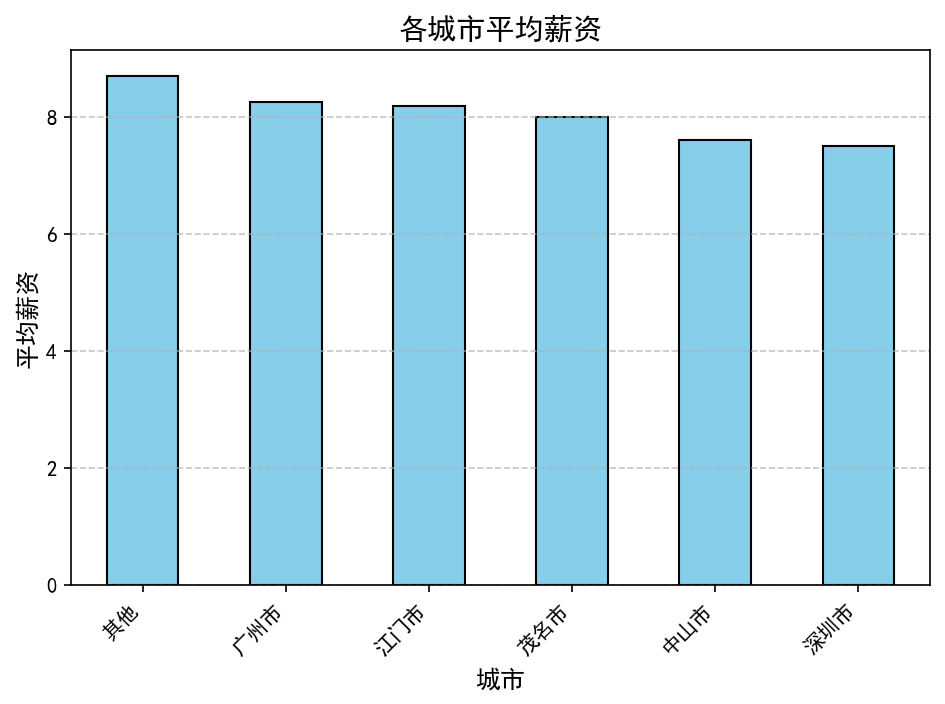

In [6]:
plt.figure(dpi=150)
plt.title("各城市平均薪资", fontsize=14, fontweight='bold')
df.groupby("City")["Salary mid"].mean().sort_values(ascending=False).plot.bar(color='skyblue', edgecolor='black')
plt.ylabel("平均薪资", fontsize=12)
plt.xlabel("城市", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("各城市平均薪资.png")

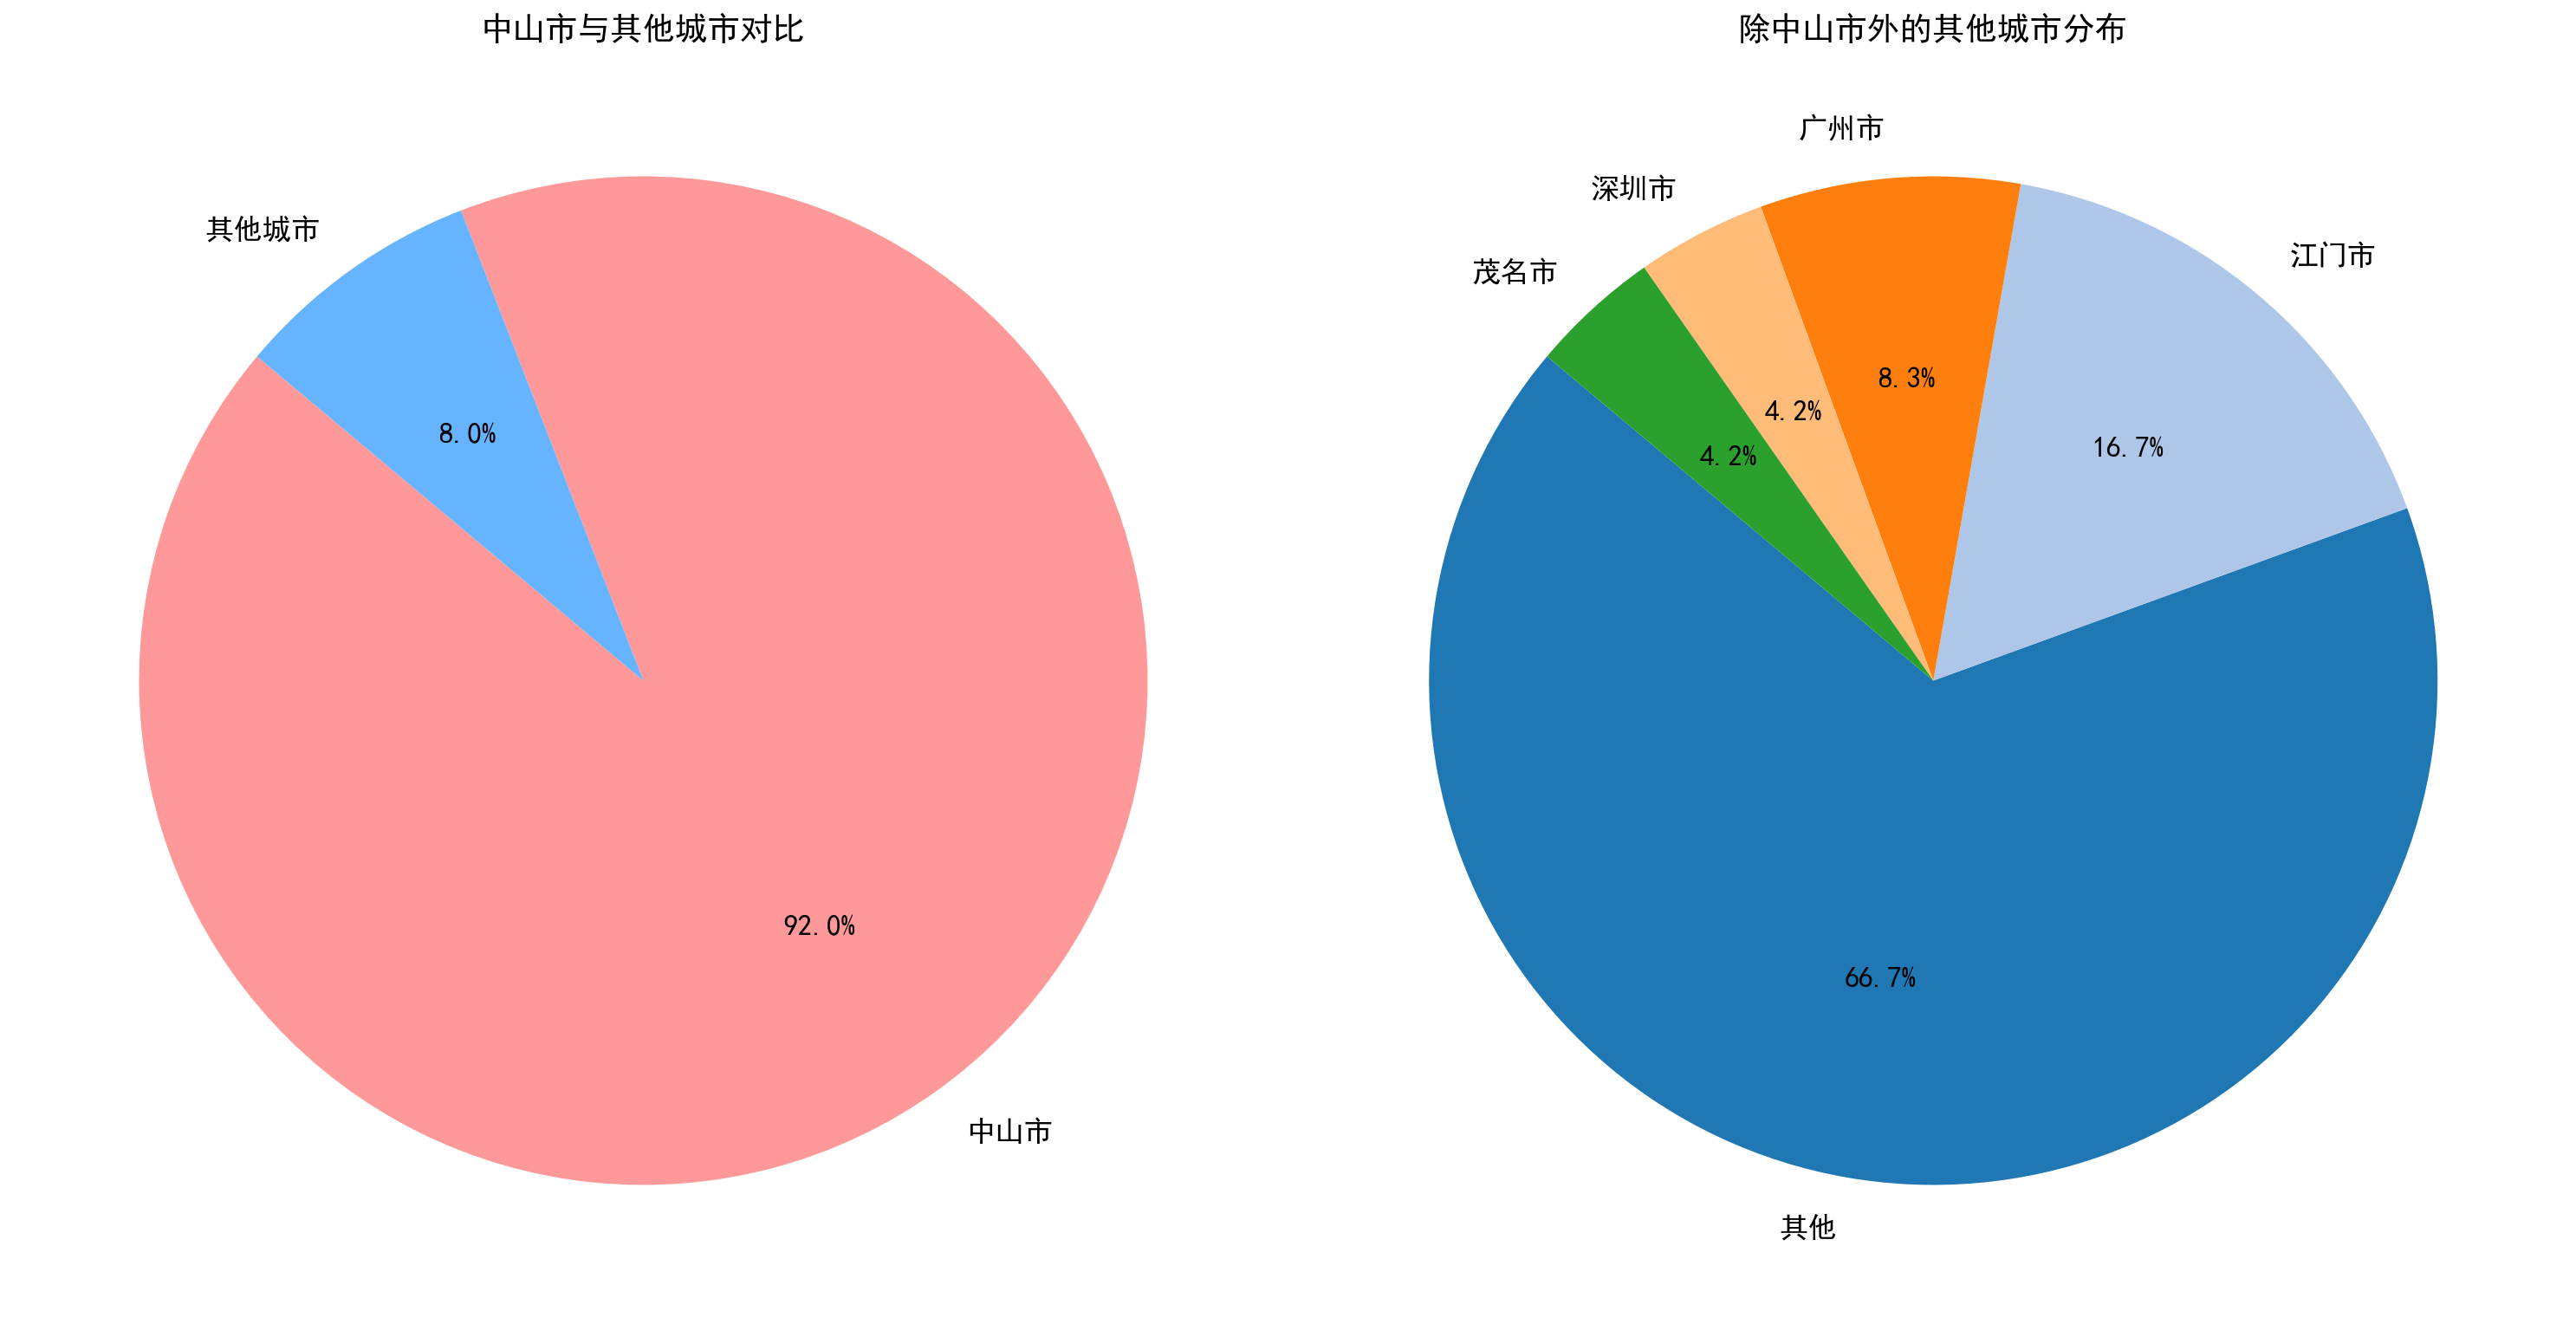

<Figure size 640x480 with 0 Axes>

In [7]:
# 准备数据
city_counts = df["City"].value_counts()
other_cities_sum = city_counts.sum() - city_counts["中山市"]  # 除中山市外的城市总数
data = {"中山市": city_counts["中山市"], "其他城市": other_cities_sum}

# 创建图表并设置大小
fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=150)

# 设置字体大小
font_size = 16  # 可以根据需要调整字体大小
title_size = 18  # 标题字体大小

# 第一个饼图：展示中山市与其他城市的对比
ax[0].pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'],
            textprops={'fontsize': font_size})
ax[0].set_title("中山市与其他城市对比", fontsize=title_size)

# 第二个饼图：展示除中山市外的其他城市数据
other_data = city_counts.drop("中山市")
ax[1].pie(other_data, labels=other_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors,
            textprops={'fontsize': font_size})
ax[1].set_title("除中山市外的其他城市分布", fontsize=title_size)

# 调整布局并显示图表
plt.tight_layout()
plt.show()

# 保存高质量图片，注意保存图片代码应在show()方法之前
plt.savefig("城市分布对比.png", dpi=300)

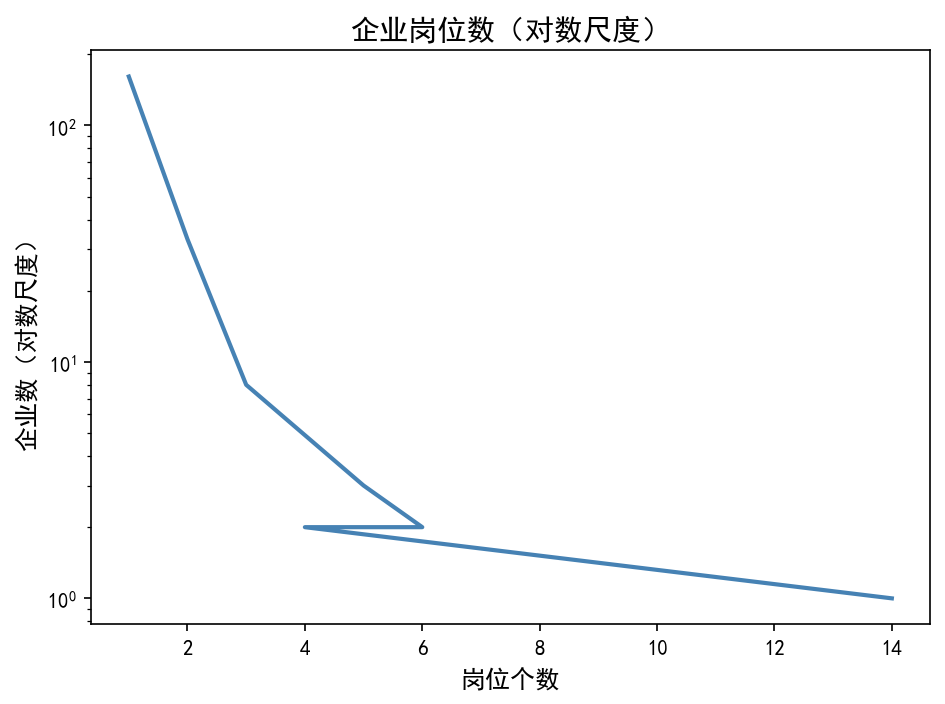

In [8]:
# 创建图表并设置分辨率
plt.figure(dpi=150)

# 绘制线图，这里使用对数尺度
df["Company"].value_counts().value_counts().sort_values(ascending=False).plot(kind='line', color='steelblue', linewidth=2, logy=True)

# 设置图表标题和轴标签
plt.title("企业岗位数（对数尺度）", fontsize=14)  # 增加标题字体大小
plt.xlabel("岗位个数", fontsize=12)  # 增加X轴标签字体大小
plt.ylabel("企业数（对数尺度）", fontsize=12)  # 增加Y轴标签字体大小，并注明使用了对数尺度

plt.tight_layout()
plt.savefig("企业岗位数_对数尺度.png")
plt.show()

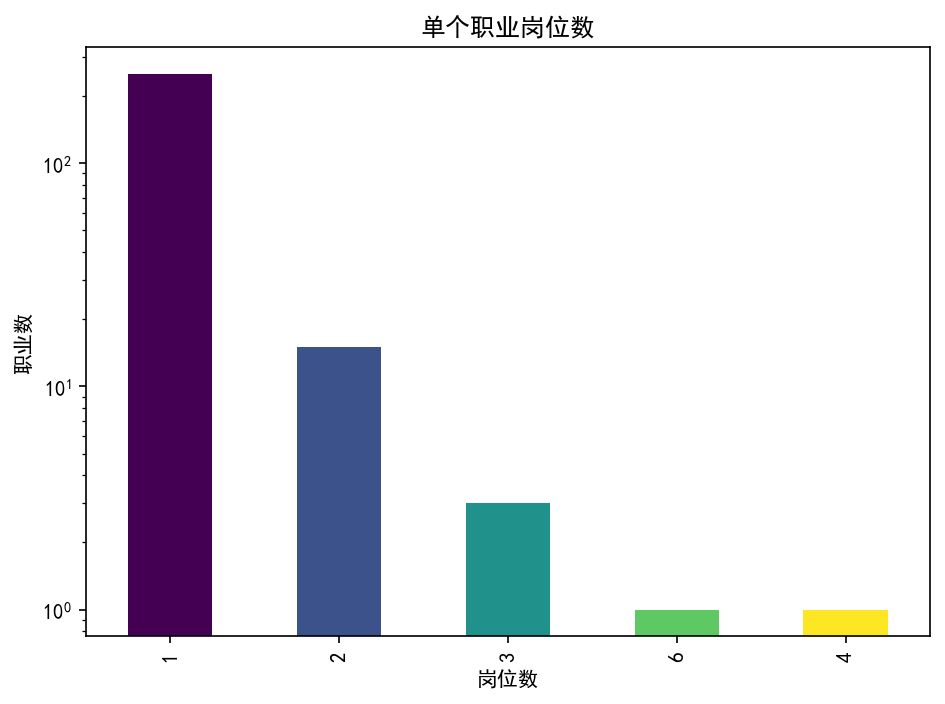

In [14]:
import numpy as np

plt.figure(dpi=150)
data = df["Position"].value_counts().value_counts().sort_values(ascending=False)

# 生成颜色映射，这里使用viridis颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

# 绘制条形图，并为每个条形指定颜色
data.plot.bar(color=colors)

plt.title('单个职业岗位数')
plt.xlabel('岗位数')
plt.ylabel('职业数')
plt.yscale('log')  # 使用对数尺度
plt.tight_layout()
plt.savefig("单个职业岗位数_丰富色彩.png")
plt.show()

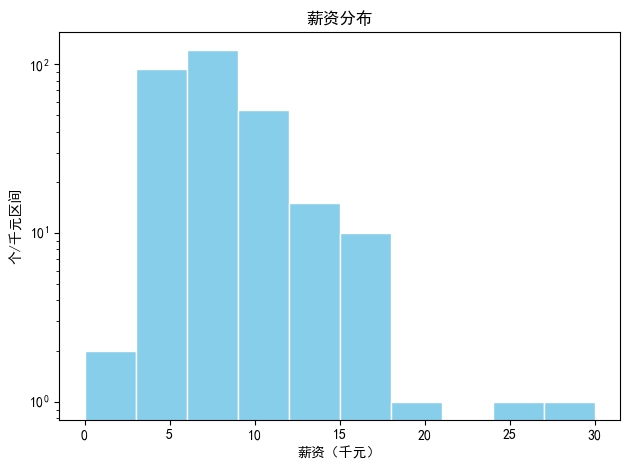

In [17]:
df["Salary mid"] = df["Salary mid"].fillna(0)

plt.hist(df["Salary mid"], color='skyblue', edgecolor='white')

# 设置图表标题和轴标签
plt.title("薪资分布")
plt.xlabel("薪资（千元）")
plt.ylabel("个/千元区间")
plt.yscale('log')  # 使用对数尺度

plt.tight_layout()
plt.savefig("薪资分布.png")
plt.show()
